# Task 7 - Basic Sales Summary from SQLite Database

## 📌 Objective
The goal of this task is to:
- Connect Python with an SQLite database.
- Run simple SQL queries to summarize sales data.
- Visualize results using matplotlib.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Connect to SQLite database (creates one if it doesn’t exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# 2. Create a sales table (if not exists)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [4]:
# 3. Insert some sample data (only if table is empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Laptop", 5, 60000),
        ("Laptop", 3, 60000),
        ("Phone", 10, 20000),
        ("Phone", 7, 20000),
        ("Tablet", 8, 15000),
        ("Tablet", 4, 15000),
        ("Headphones", 15, 2000),
        ("Headphones", 12, 2000),
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [5]:
# 4. Run SQL query to calculate total sales per product
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [6]:
df = pd.read_sql_query(query, conn)

# 5. Display results
print("Sales Summary:")
print(df)

Sales Summary:
      product  total_qty   revenue
0  Headphones         27   54000.0
1      Laptop          8  480000.0
2       Phone         17  340000.0
3      Tablet         12  180000.0


<Figure size 800x500 with 0 Axes>

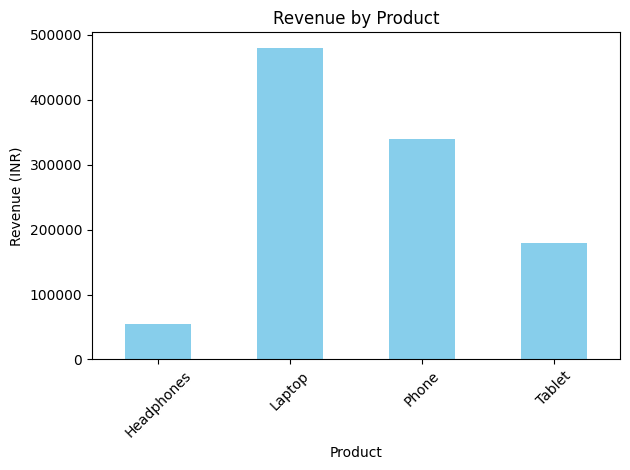

In [10]:
# 6. Visualization - Bar chart of Revenue per Product
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color="skyblue")
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart as image
plt.show()


In [11]:
# 7. Close connection
conn.close()
